<a href="https://colab.research.google.com/github/EndangSupriyadi/Book-Recommendation-System/blob/main/Proyek_Book_Recommendation_Machine_Learning_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **Libraries**

pada tahap ini kita mengimport library yang akan digunakan seperti kaggle, numpy dll

In [1]:
! pip install kaggle
import os
import numpy as np
import matplotlib.pyplot as plt



Selanjutnya, menghubungkan Google Colab dengan Google Drive untuk menyimpan dan mengakses dataset.

#**Data Collection**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Masuk ke folder penyimpanan:

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


Download dataset menggunakan Kaggle API:

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Ekstrak file ZIP:

In [6]:
!unzip \*.zip && rm *.zip.

Archive:  book-recommendation-dataset.zip
replace Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    
rm: cannot remove '*.zip.': No such file or directory


#**Load Data**

In [7]:
import pandas as pd

book_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books.csv')
rating_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Ratings.csv')
users_dataset= pd.read_csv('/content/gdrive/My Drive/Kaggle/Users.csv')


/tmp/ipython-input-3432999720.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books.csv')


Menampilkan jumlah baris dan kolom dalam masing–masing dataset:

In [8]:
book_dataset.shape


(271360, 8)

In [9]:
rating_dataset.shape


(1149780, 3)

In [10]:
users_dataset.shape

(278858, 3)

#**EDA**

In [11]:
book_dataset

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [12]:
rating_dataset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Univariate Data Analysis <br>
Meneliti distribusi rating dari rating dataframe dengan Barplot

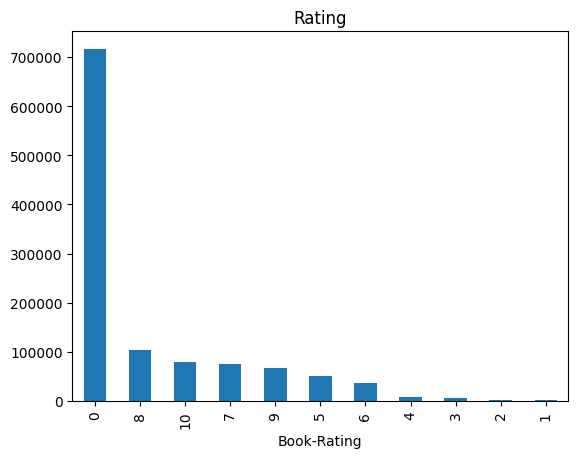

In [13]:
count = rating_dataset["Book-Rating"].value_counts()
count.plot(kind='bar', title="Rating");

plt.show()

Meneliti distribusi tahun terbitnya buku dari book dataframe dengan Barplot



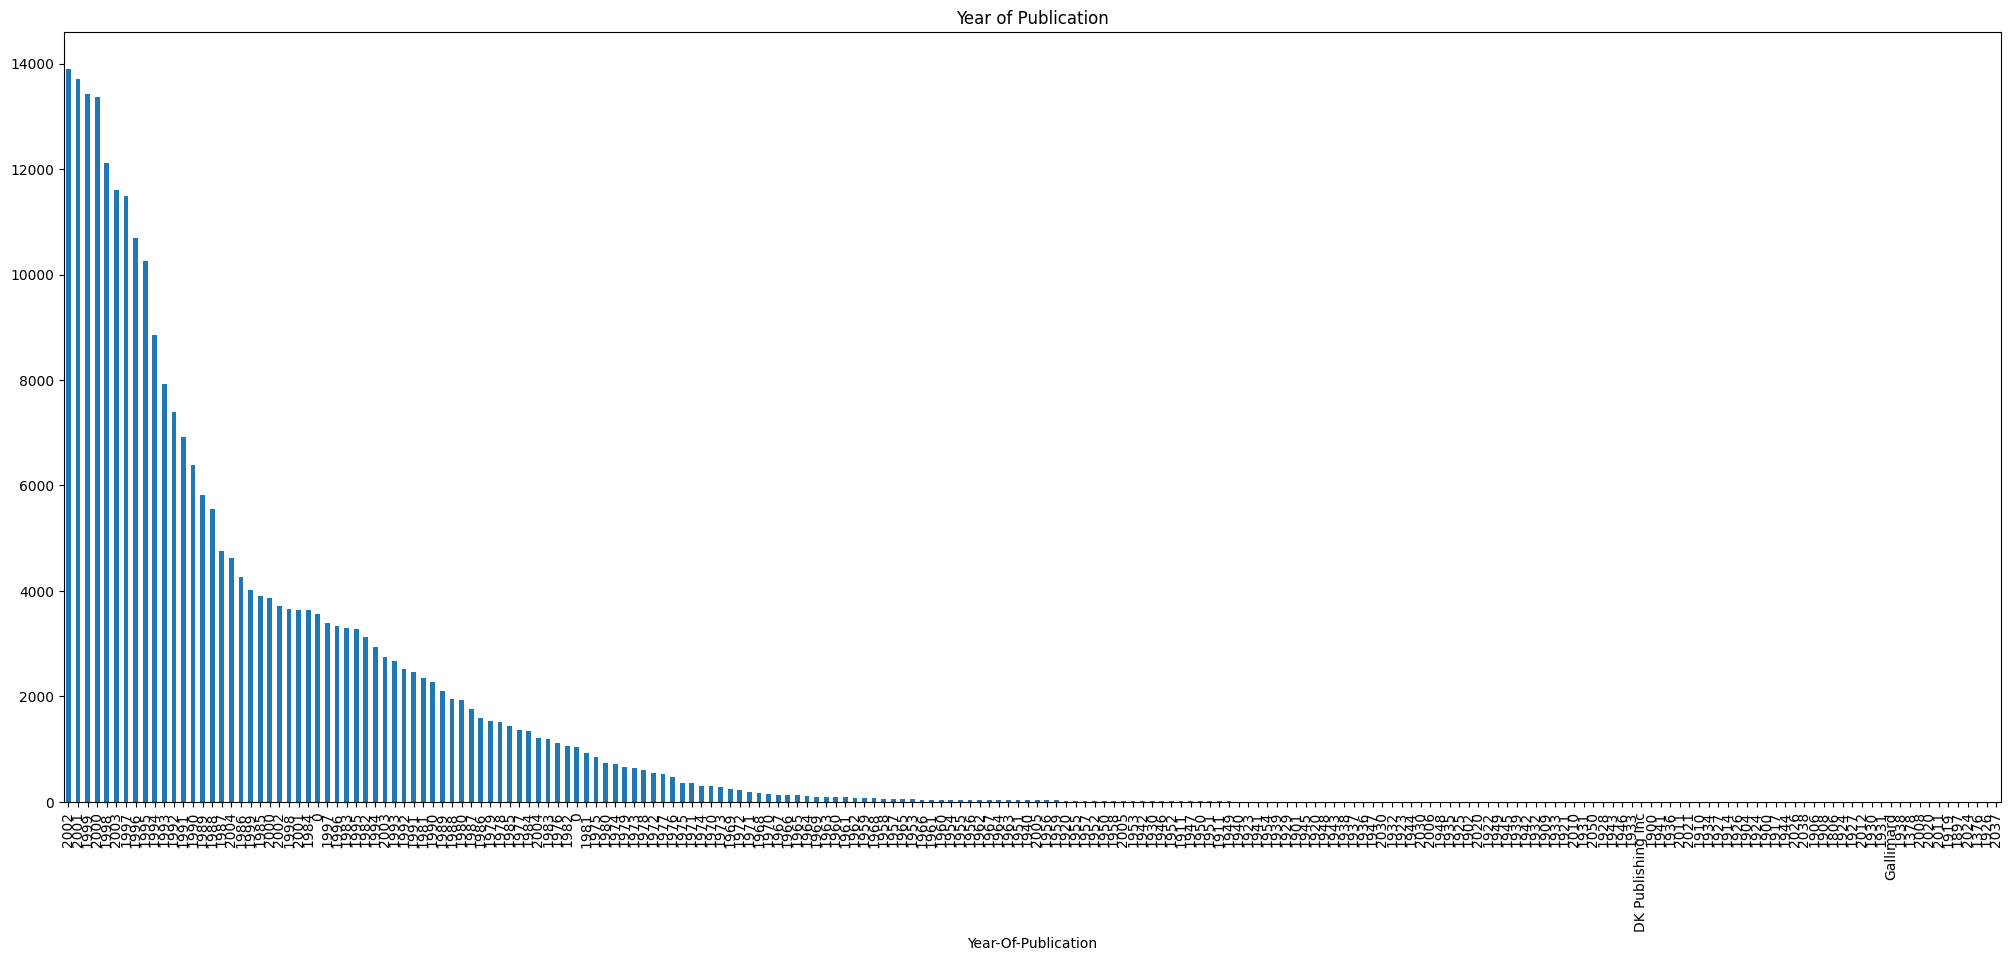

In [14]:
count = book_dataset["Year-Of-Publication"].value_counts()
count.plot(kind='bar', title="Year of Publication", figsize=(25, 10));

plt.show()

Multivariate Analysis



Melihat pairplot yang ada pada rating dataset


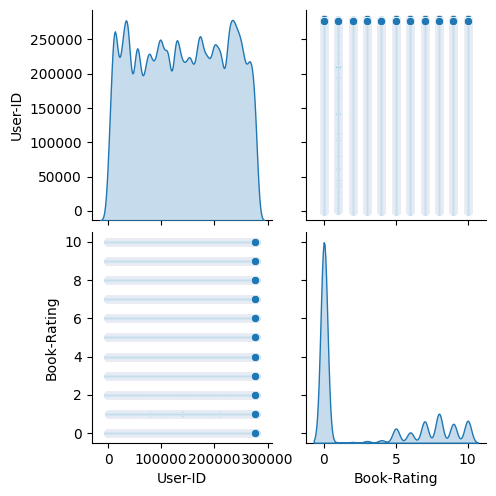

In [15]:
import seaborn as sns
sns.pairplot(rating_dataset, diag_kind = 'kde')

Cek Duplikasi book dataset

In [16]:
# Jumlah total baris
total_rows = len(book_dataset)

# Jumlah baris unik berdasarkan Title dan Author
unique_rows = len(book_dataset.drop_duplicates(subset=['Book-Title', 'Book-Author']))

# Jumlah baris yang merupakan duplikasi
num_duplicates = total_rows - unique_rows

print(f"\nTotal Baris Awal: {total_rows}")
print(f"Jumlah Baris Unik (berdasarkan Title & Author): {unique_rows}")
print(f"Jumlah Baris Duplikat yang Akan Dihapus: {num_duplicates}")


Total Baris Awal: 271360
Jumlah Baris Unik (berdasarkan Title & Author): 251185
Jumlah Baris Duplikat yang Akan Dihapus: 20175


Cek Duplikasi rating dataset

In [17]:
total_rows = len(rating_dataset)
duplicate_rows = rating_dataset.duplicated().sum()

print(f"Total Baris: {total_rows}")
print(f"Jumlah Baris Duplikat: {duplicate_rows}")


Total Baris: 1149780
Jumlah Baris Duplikat: 0


Cek Missing Value

In [18]:
book_dataset.isnull().sum()



,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [19]:
rating_dataset.isnull().sum()


,0
User-ID,0
ISBN,0
Book-Rating,0


meneliti Id buku apa saja yang ada di rate 10 oleh pengguna



In [20]:
# Ambil nilai rating tertinggi
max_rating = rating_dataset['Book-Rating'].max()

# Data dengan rating tertinggi
best_books = rating_dataset[
    rating_dataset['Book-Rating'] == max_rating
]

# Ambil ISBN buku dengan rating tertinggi
best_booksId = rating_dataset['ISBN'][
    rating_dataset['Book-Rating'] == max_rating
]

# Hilangkan duplikasi ISBN
best_booksId = list(dict.fromkeys(best_booksId))


meneliti buku apa saja yang ada di rate 10 oleh pengguna

In [21]:
# best_books = []
# for i in best_booksId:
#     books_name = book_dataset['Book-Title'][book_dataset.ISBN == i]
#     best_books.append(books_name)

In [22]:
# best_books

Meneliti jumlah buku-buku bagus

In [23]:
# len(best_books)

# **Data** **Preprocessing**


Menghapus baris duplikat

In [24]:
# Menghapus baris duplikat
book_dataset = book_dataset.drop_duplicates(subset=['Book-Title', 'Book-Author'], keep='first')

print(f"\nTotal Baris Setelah Duplikasi Dihapus: {len(book_dataset)}")



Total Baris Setelah Duplikasi Dihapus: 251185


In [25]:
# Menghapus Missing value book_dataset
book_dataset = book_dataset.dropna(axis=0)
book_dataset.isnull().sum()


,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [26]:
# Filtering Year-Of-Publication bukan 0
book_dataset = book_dataset[book_dataset['Year-Of-Publication'] != 0]

In [27]:
# Normalisasi Nama Kolom Rating dataset
rating_dataset = rating_dataset.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

In [28]:
# Normalisasi Nama Kolom Book dataset
book_dataset = book_dataset.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

In [29]:
# Mengambil data sebagian untuk membangun model
book_dataset = book_dataset[:10000]
rating_dataset=rating_dataset[:5000]

mengubah dataframe dari buku menjadi list

In [30]:
book_ISBN = book_dataset['ISBN'].tolist()

book_title = book_dataset['book_title'].tolist()

book_author = book_dataset['book_author'].tolist()

book_year_of_publication = book_dataset['year_of_publication'].tolist()

Setelah kita membuat list, kita perlu membuat dictionary yang digunakan untuk menentukan pasangan key-value pada book_ISBN, book_title, book_author, dan book_year_of_publication.

In [31]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,3251004557,Holidays on Ice. Neue Geschichten.,David Sedaris,1999
9996,344254162X,Frische Goldjungs. Storys.,Wladimir Kaminer,2001
9997,2253137243,Le Jour des fourmis,Bernard Werber,1995
9998,0345456335,Dragonflight,Anne McCaffrey,2002


Pada cell code di bawah ini, saya akan meyandikan user_id menjadi integer



In [32]:
user_ids = rating_dataset['user_id'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Pada cell code di bawah ini, saya akan meyandikan book_id menjadi integer



In [33]:
book_ids = rating_dataset['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

rating_dataset['user'] = rating_dataset['user_id'].map(user_to_user_encoded)
rating_dataset['book'] = rating_dataset['ISBN'].map(book_to_book_encoded)

Terakhir, kita akan cek jumlah pengguna dan jumlah buku, serta mengubah tipe data rating menjadi float



In [34]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
rating_dataset['rating'] = rating_dataset['rating'].values.astype(np.float32)

min_rating = min(rating_dataset['rating'])
max_rating = max(rating_dataset['rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4688
Number of User: 679, Number of Book: 4688, Min Rating: 0.0, Max Rating: 10.0


Membagi Dataset

Sebelum kita membagi dataset menjadi data latih dan data validasi, kita terlebih dahulu harus mengacak dataset



In [35]:
rating_dataset = rating_dataset.sample(frac=1, random_state=42)
rating_dataset

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Pada cell code di bawah ini, saya membagi dataset yang ada menjadi 80% untuk latihan dan 20% untuk validasi



In [36]:
x = rating_dataset[['user', 'book']].values

y = rating_dataset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.80 * rating_dataset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


#**Modeling**

##**Content Filtered Recommendation System**

TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen. Kita umumnya menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus. Metode sering digunakan dalam Information Retrieval dan Text Mining.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(book['book_author'])

feature_names = tf.get_feature_names_out()
print(feature_names)


['aaron' 'aarsen' 'abbey' ... 'âºlveda' 'â¼ltner' 'â¼skind']


Kemudian kita akan lakukan fit dan transformasi ke dalam matriks, pada code di bawah ini, matriks tersebut adalah tfidf_matrix

In [38]:
tfidf_matrix = tf.fit_transform(book['book_author'])

tfidf_matrix.shape

(10000, 5717)

Pada tfidf_matrix terdapat 10000 ukuran data dan 5575 nama penulis buku



.todense(), atribut ini dipakai untuk mengubah tfidf_matrix yang awalnya vektor menjadi matriks

In [39]:
tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat matriks dari judul buku dengan penulis - penulis buku

In [40]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book.book_title
).sample(17, axis=1,replace=True).sample(10, axis=0)

,leno,dunne,tucker,antoine,mcdonnell,tiger,codell,orde,lightman,gloeckner,fried,volk,peggy,gregory,mcintosh,siegfried,kon
book_title,,,,,,,,,,,,,,,,,
Louise Brindley Omnibus (Pb),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cities of the Dead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Tiger in the Well (Sally Lockhart Trilogy, Book 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Silver Chair (full color) (Narnia),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mysterious Affair at Styles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dix petits nÃ?Â¨gres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manuela (Narrativa colombiana),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
After Henry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Texaco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, kita perlu mencari cara supaya item yang kita rekomendasikan tidak terlalu jauh dari data pusat, oleh karena itu kita butuh derajat kesamaan pada item, dalam proyek ini, buku dengan derajat kesamaan antar buku dengan cosine similarity

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada code di bawah ini kita akan membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul dari buku

In [42]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

Di bawah ini adalah fungsi untuk mendapatkan rekomendasi berbasis penulis buku dengan k sebagai jumlah rekomendasi yang diinginkan, dalam fungsi ini, kita akan mendapatkan 5 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [43]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pada code cell di bawah ini, kita akan mencari rekomendasi dari buku yang sudah dibaca, dalam kasus ini, buku yang sudah dibaca adalah "The Diaries of Adam and Eve" yang ditulis oleh Mark Twain dan terbit pada tahun 1998

In [44]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4505,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


Pada cell code di bawah ini, kita akan mendapatkan 5 rekomendasi dari buku "The Diaries of Adam and Eve"

In [45]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

Pada beberapa kasus, rekomendasi akan memberikan rekomendasi yang terduplikat, sehingga perlu dibuang rekomendasi yang terduplikat

In [46]:
recommendations = recommendations.drop_duplicates()

Berikut adalah 5 buku rekomendasi yang ditulis oleh Mark Twain



In [47]:
recommendations

,book_title,book_author
0,The Adventures of Tom Sawyer (Penguin Popular ...,Mark Twain
1,Treasury of Illustrated Classics: Adventures o...,Mark Twain
2,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain
3,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (B...,Mark Twain


In [48]:
recommended_books = recommendations['book_title'].tolist()


In [49]:
recommended_books

['The Adventures of Tom Sawyer (Penguin Popular Classics)',
 'Treasury of Illustrated Classics: Adventures of Huckleberry Finn',
 "A Connecticut Yankee in King Arthur's Court (Dover Thrift Editions)",
 'ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASSIC ) : ADVENTURES OF HUCKLEBERRY FINN',
 "A Connecticut Yankee in King Arthur's Court (Bantam Classic)"]

###**Evaluation**

Kita akan memakai metrik evaluasi akurasi di mana akurasi adalah:

Jumlah buku yang direkomendasikan sesuai penulis / Jumlah buku yang ditulis oleh penulis yang sama

Variabel books_that_have_been_read_row di bawah ini akan mengambil satu row dari buku yang pernah dibaca sebelumnya, dan variabel books_that_have_been_read_author adalah penulis buku dari buku yang pernah dibaca sebelumnya

In [50]:
books_that_have_been_read_row = book_dataset[book_dataset.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

Variabel books_with_the_same_author menunjukkan jumlah buku yang sudah ditulis oleh penulis buku yang berasal dari buku yang pernah dibaca sebelumnya

In [51]:
books_with_the_same_author = book_dataset[book_dataset.book_author == books_that_have_been_read_author].shape[0]
print(books_with_the_same_author)

15


Ternyata buku yang telah ditulis oleh Mark Twain berjumlah 15 buku


Dalam evaluasi yang digunakan adalah precision yaitu salah satu metrik yang digunakan untuk mengukur seberapa akurat sistem rekomendasi dalam memberikan rekomendasi yang relevan kepada pengguna. membandingkan tingkat kesamaannya metrik evaluasi precision: Jumlah buku yang memiliki kemiripan dalam buku yang direkomendasikan/ Jumlah buku yang direkomendasikan penulis buku yang sudah di baca Mark Twain seperti tabel 5, dan jumlah buku yang direkomendasikan tabel 6 jadi precision : 5/5 = 100% sama

##**Collaborative Based Filtering**

Collaborative Based Filtering adalah sistem rekomendasi berdasarkan pendapat suatu komunitas.

Kelebihan pada Collaborative Based Filtering bila dibandingkan dengan Content Based Filtering adalah pengguna dapat mengeksplorasi item atau konten di luar preferensi pengguna. Pengguna pun juga dapat mendapat rekomendasi sesuai dengan kecenderungan publik yang dianalisa lewat penilaian pengguna - pengguna lainnya.

Kekurangan pada Collaborative Based Filtering adalah pengguna kurang mendapatkan rekomendasi sesuai preferensi pribadi. Konten - konten yang diberikan oleh sistem rekomendasi lebih banyak berasal dari preferensi publik dan bukan preferensi pribadi.

Pada Collaborative Based Filtering, saya menggunakan penilaian dari pengguna - pengguna untuk mendapatkan rekomendasi buku - buku.

In [52]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [53]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_rating, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_rating = num_rating
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_rating,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_rating, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    rating_vector = self.resto_embedding(inputs[:, 1])
    rating_bias = self.resto_bias(inputs[:, 1])

    dot_user_rating = tf.tensordot(user_vector, rating_vector, 2)

    x = dot_user_rating + user_bias + rating_bias

    return tf.nn.sigmoid(x)

Selanjutnya kita melakukan proses compile pada model dengan binary crossentropy sebagai loss function, adam sebagai optimizer, dan RMSE sebagai metrik dari model



In [54]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.6808 - root_mean_squared_error: 0.4312 - val_loss: 0.6366 - val_root_mean_squared_error: 0.4041
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.5841 - root_mean_squared_error: 0.3734 - val_loss: 0.6051 - val_root_mean_squared_error: 0.3856
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5280 - root_mean_squared_error: 0.3408 - val_loss: 0.5885 - val_root_mean_squared_error: 0.3765
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4972 - root_mean_squared_error: 0.3239 - val_loss: 0.5738 - val_root_mean_squared_error: 0.3688
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4830 - root_mean_squared_error: 0.3156 - val_loss: 0.5628 - val_root_mean_squared_error: 0.3633
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.4594 - root_mean_squared_error: 0.3005 - val_loss: 0.5543 - val_root_mean_squared_error: 0.3592
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Visualisasi Metrik


Berikut adalah hasil latihan dari data yang ada, evaluasi metrik yang digunakan adalah RMSE



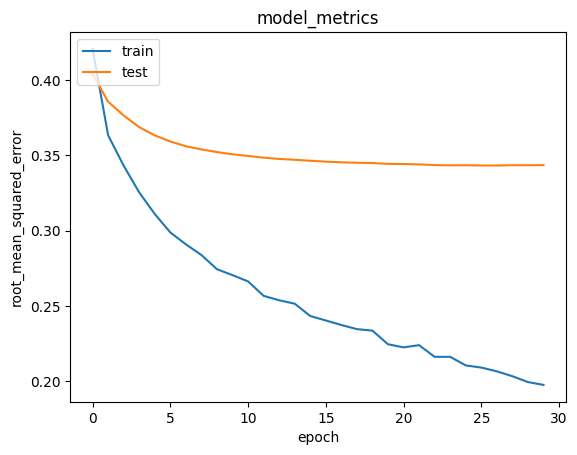

In [56]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan Rekomendasi

Sebelumnya, kita perlu mendefinisikan ulang book_datase dan rating_dataset



In [57]:
book_dataset =  book_dataset
rating_dataset = rating_dataset

Pada cell code di bawah ini, kita akan mengambil user_id secara acak dari rating_dataset. Dari user_id ini kita perlu mengetahui buku - buku apa saja yang pernah dibaca dan yang belum pernah dibaca, sehingga kita hanya dapat merekomendasikan buku - buku yang belum dibaca.

In [58]:
user_id = rating_dataset.user_id.sample(1).iloc[0]
books_have_been_read_by_user = rating_dataset[rating_dataset.user_id == user_id]

books_have_not_been_read_by_user = book_dataset[book_dataset['ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['ISBN']
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)

books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

Pada code cell terakhir di bawah ini, kita akan merekomendasikan 10 buku dari user



In [59]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]

top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_row = book_dataset[book_dataset['ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)

recommended_books = book_dataset[book_dataset['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Mama Makes Up Her Mind: And Other Dangers of Southern Living : Bailey White
--------------------------------
Top 10 Book Recommendation for user: 277928
--------------------------------
Midnight in the Garden of Good and Evil: A Savannah Story : John Berendt
The Client : John Grisham
Bridget Jones : The Edge of Reason : Helen Fielding
A Year in Provence : Peter Mayle
Mama Makes Up Her Mind: And Other Dangers of Southern Living : Bailey White
The Pelican Brief : JOHN GRISHAM
Running with Scissors : Augusten Burroughs
The Virgin Suicides : Jeffrey Eugenides
Toujours Provence (Vintage Departures) : Peter Mayle
Bill Bryson's African Diary : BILL BRYSON
